<a href="https://colab.research.google.com/github/K-Wolfe-hub/spds_capstone_3/blob/main/spds_capstone_3_preprocessing_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from shutil import copyfile

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Loading data

In [3]:
#Read the header data for the wells in Washington Co.
wash_imgs = pd.read_csv('gdrive/My Drive/Springboard_Capstone_3/wash_imgs.csv')
wash_imgs.head(2)

,Unnamed: 0,PERMIT_NUMBER,X,Y,PERMIT_NUMBER.1,WELL_NAME,OPERATOR,OPERATOR_NUMBER,WELL_TYPE,WELL_STATUS,WELL_STATUS_CODE,PERMIT_DATE,SPUD_DATE,DATE_PLUGGED,CONSERVATION_IND,WELL_CONFIG_CODE,UNCONVENTIONAL_IND,COUNTY,COUNTY_ID,MUNICIPALITY,MUNICIPALITY_TYPE,MUNICIPALITY_CODE,LATITUDE,LONGITUDE,SURFACE_ELEVATION,WELL_PAD_ID,SITE_ID,SITE_NAME,OBJECTID,PERMIT_DATE_EXPIRES,visible,vintage,rotation,flip,path,image
0,0,3712500025,-8942494.737,4883347.958,3712500025,A L ASHBROOK (NOW) A D MOUNTS U328,PRESTON OIL CO,OGO-12613,UNDETERMINED,Plugged OG Well,15.0,1956/04/01 00:00:00+00,1800/01/01 00:00:00+00,NaN,N,Vertical Well,N,Washington,63.0,Buffalo,Twp,63916.0,40.119672,-80.331797,1236.0,0.0,228821.0,AL ASHBROOK NOW AD MT U328 WELL,539040.0,NaN,1.0,1800.0,0,0,gdrive/My Drive/wash250/visible/3712500025.tif,[[[133 146 109 144]\n [111 133 94 153]\n [1...
1,1,3712500026,-8939583.175,4875449.422,3712500026,HUGH A DAY (PAUL DAY) U824,PRESTON OIL CO,OGO-12613,GAS,Plugged OG Well,15.0,NaN,1800/01/01 00:00:00+00,1957/09/27 00:00:00+00,N,Vertical Well,N,Washington,63.0,Morris,Twp,63943.0,40.065392,-80.305642,1185.0,0.0,228822.0,HUGH A DAY PAUL DAY U824 WELL,495577.0,NaN,0.0,1800.0,0,0,gdrive/My Drive/wash250/not_visible/3712500026...,[[[ 98 109 93]\n [ 69 80 64]\n [ 37 48 ...


In [4]:
wash_imgs['image'] = wash_imgs['path'].map(lambda x: cv.resize(cv.imread(x),(85,84),interpolation= cv.INTER_LINEAR))

In [5]:
y = wash_imgs.visible
X = wash_imgs.drop(columns='visible')

In [6]:
#split dataset in to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

##Only run once folder setup

In [7]:
#apparently keras.preprocessing requires an image format other than tif. This is a tool to convert my tif images to jpg.
#based on the concept of the code from https://thequickblog.com/convert-any-image-to-jpg-format-using-python/
from PIL import Image
def dirTif2JPG(dir,targetDir):
  imageFiles = [f for f in listdir(dir) if isfile(join(dir, f))]
  for i in imageFiles:
    test = i.split('.')
    if test[1] == 'tif':
      img = Image.open(dir+i)
      target_name = test[0] + ".jpg"
      rgb_image = img.convert('RGB')
      rgb_image.save(dir+target_name)
    else:
      pass
  return

In [8]:
#only run once, seting up files in folders for keras
#for f in vis_train:
#  copyfile('gdrive/My Drive/wash250/visible/'+f,'gdrive/My Drive/wash250/training_data/visible/'+f)
#dirTif2JPG('gdrive/My Drive/wash250/training_data/visible/','gdrive/My Drive/wash250/training_data/visible/')

In [9]:
#only run once, seting up files in folders for keras
#for f in vis_valid:
#  copyfile('gdrive/My Drive/wash250/visible/'+f,'gdrive/My Drive/wash250/validation_data/visible/'+f)
#dirTif2JPG('gdrive/My Drive/wash250/validation_data/visible/','gdrive/My Drive/wash250/validation_data/visible/')

In [10]:
#only run once, seting up files in folders for keras
#for f in vis_test:
#  copyfile('gdrive/My Drive/wash250/visible/'+f,'gdrive/My Drive/wash250/testing_data/visible/'+f)
#dirTif2JPG('gdrive/My Drive/wash250/testing_data/visible/','gdrive/My Drive/wash250/testing_data/visible/')

In [11]:
#only run once, seting up files in folders for keras
#for f in notvis_train:
#  copyfile('gdrive/My Drive/wash250/not_visible/'+f,'gdrive/My Drive/wash250/training_data/not_visible/'+f)
#dirTif2JPG('gdrive/My Drive/wash250/training_data/not_visible/','gdrive/My Drive/wash250/training_data/not_visible/')

In [12]:
#only run once, seting up files in folders for keras
#for f in notvis_valid:
#  copyfile('gdrive/My Drive/wash250/not_visible/'+f,'gdrive/My Drive/wash250/validation_data/not_visible/'+f)
#dirTif2JPG('gdrive/My Drive/wash250/validation_data/not_visible/','gdrive/My Drive/wash250/validation_data/not_visible/')

In [13]:
#only run once, seting up files in folders for keras
#for f in notvis_test:
#  copyfile('gdrive/My Drive/wash250/not_visible/'+f,'gdrive/My Drive/wash250/testing_data/not_visible/'+f)
#dirTif2JPG('gdrive/My Drive/wash250/testing_data/not_visible/','gdrive/My Drive/wash250/testing_data/not_visible/')

In [14]:
#dirTif2JPG('gdrive/My Drive/wash250/validation_data/not_visible/','gdrive/My Drive/wash250/validation_data/not_visible/')

In [15]:
#dirTif2JPG('gdrive/My Drive/wash250/validation_data/visible/','gdrive/My Drive/wash250/validation_data/visible/')
#dirTif2JPG('gdrive/My Drive/wash250/training_data/not_visible/','gdrive/My Drive/wash250/training_data/not_visible/')
#dirTif2JPG('gdrive/My Drive/wash250/training_data/visible/','gdrive/My Drive/wash250/training_data/visible/')

##Creation of numpy train_test_split files

In [16]:
X_train_np = []
X_test_np = []
y_train_np = []
y_test_np = []
for i in range(len(X_train)):
  X_train_np.append(cv.resize(cv.imread(X_train.iloc[i].path),(85,84),interpolation= cv.INTER_LINEAR))
  y_train_np.append(y_train.iloc[i])
for i in range(len(X_test)):
  X_test_np.append(cv.resize(cv.imread(X_test.iloc[i].path),(85,84),interpolation= cv.INTER_LINEAR))
  y_test_np.append(y_test.iloc[i])

##Initial Dummy Model - random assignment of classification

In [17]:
#This initial model is going to be set up to predict randomly based on the training set's distribution - set by strategy = 'stratified'. This should result in an about 50% prediction of a pad in the image and 50% without a pad.
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.510989010989011

The dummy model has the expected 50% accuracy score.

##Dense Keras model Simple

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
#Single layer Keras model Dropout to prevent overtraining
smodel = Sequential()
smodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(84, 85, 3)))
smodel.add(Flatten())
smodel.add(Dropout(.2))
#using sigmoid for my activation becuase my result is binary
smodel.add(Dense(1, activation='sigmoid'))

smodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [19]:
# Fit the model to training data 
X_train_np = np.asarray(X_train_np)
y_train_np = np.asarray(y_train_np)
smodel.fit(X_train_np, y_train_np,epochs=5, batch_size=10)

Epoch 1/5
437/437 [==============================] - 27s 61ms/step - loss: 4.5874 - accuracy: 0.8841
Epoch 2/5
437/437 [==============================] - 27s 61ms/step - loss: 0.0169 - accuracy: 0.9954
Epoch 3/5
437/437 [==============================] - 26s 59ms/step - loss: 0.0029 - accuracy: 0.9995
Epoch 4/5
437/437 [==============================] - 26s 60ms/step - loss: 3.9151e-04 - accuracy: 1.0000
Epoch 5/5
437/437 [==============================] - 26s 59ms/step - loss: 1.9753e-04 - accuracy: 1.0000


In [20]:
X_test_np = np.asarray(X_test_np)
y_test_np = np.asarray(y_test_np)
results = smodel.evaluate(X_test_np,y_test_np,batch_size=10)
print(results)

110/110 [==============================] - 2s 15ms/step - loss: 0.0600 - accuracy: 0.9881
[0.059953249990940094, 0.988095223903656]


In [21]:
smodel.save('gdrive/My Drive/Springboard_Capstone_3/simpleConv2D')

INFO:tensorflow:Assets written to: gdrive/My Drive/Springboard_Capstone_3/simpleConv2D/assets


In [22]:
ypred = smodel.predict(X_test_np,batch_size=10)

In [23]:
ypred_map = np.round(ypred)
ypred_map[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [24]:
from sklearn import metrics
print("Model Sequential - Simple 1 layer")
print("Accuracy:", metrics.accuracy_score(y_test_np,ypred_map))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test_np,ypred_map))
print('Precision score for "Yes"' , metrics.precision_score(y_test_np,ypred_map, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test_np,ypred_map, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test_np,ypred_map, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test_np,ypred_map, pos_label = 0))

Model Sequential - Simple 1 layer
Accuracy: 0.9880952380952381
Balanced accuracy: 0.989202657807309
Precision score for "Yes" 1.0
Precision score for "No" 0.974155069582505
Recall score for "Yes" 0.978405315614618
Recall score for "No" 1.0


In [25]:
#create a dataframe to store the file, actual status, and predicted status
model_results = pd.DataFrame(data=None,columns=['path','actual','predicted'])
for i in range(len(y_test_np)):
  temp = [X_train['path'].iloc[i],y_test_np[i],ypred_map[i].item()]
  tempdf = pd.DataFrame([temp],columns=['path','actual','predicted'])
  model_results=model_results.append(tempdf,ignore_index=True)
model_results.head(2)

,path,actual,predicted
0,gdrive/My Drive/wash250/visible/3712501259.tif,1.0,1.0
1,gdrive/My Drive/wash250/visible/3712522304.tif,0.0,0.0


In [26]:
confusion_matrix = pd.crosstab(model_results['actual'],model_results['predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0.0  1.0
Actual             
0.0        490    0
1.0         13  589


This model does well, but miscatigorizes many of the images lacking signs of a pad as pad bearing

##Dense Keras model 2x Convolution + Max pooling

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(84, 85, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dropout(.2))
#using sigmoid for my activation becuase my result is binary
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [51]:
# Fit the model to training data 
X_train_np = np.asarray(X_train_np)
y_train_np = np.asarray(y_train_np)
model.fit(X_train_np, y_train_np,epochs=7, batch_size=10)

Epoch 1/7
437/437 [==============================] - 46s 104ms/step - loss: 2.1026 - accuracy: 0.6997
Epoch 2/7
437/437 [==============================] - 45s 103ms/step - loss: 0.3688 - accuracy: 0.8415
Epoch 3/7
437/437 [==============================] - 45s 103ms/step - loss: 0.1424 - accuracy: 0.9498
Epoch 4/7
437/437 [==============================] - 45s 103ms/step - loss: 0.0673 - accuracy: 0.9760
Epoch 5/7
437/437 [==============================] - 45s 104ms/step - loss: 0.0673 - accuracy: 0.9780
Epoch 6/7
437/437 [==============================] - 45s 102ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 7/7
437/437 [==============================] - 45s 104ms/step - loss: 0.0222 - accuracy: 0.9924


In [52]:
X_test_np = np.asarray(X_test_np)
y_test_np = np.asarray(y_test_np)
results = model.evaluate(X_test_np,y_test_np,batch_size=10)
print(results)

110/110 [==============================] - 3s 28ms/step - loss: 0.0429 - accuracy: 0.9899
[0.042889270931482315, 0.9899267554283142]


In [53]:
model.save('gdrive/My Drive/Springboard_Capstone_3/initalConv2D')

INFO:tensorflow:Assets written to: gdrive/My Drive/Springboard_Capstone_3/initalConv2D/assets


In [54]:
ypred = model.predict(X_test_np,batch_size=10)

In [55]:
ypred_map = np.round(ypred)
ypred_map[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [56]:
from sklearn import metrics
print("Model Sequential - Conv x 2, Max Pooling")
print("Accuracy:", metrics.accuracy_score(y_test_np,ypred_map))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test_np,ypred_map))
print('Precision score for "Yes"' , metrics.precision_score(y_test_np,ypred_map, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test_np,ypred_map, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test_np,ypred_map, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test_np,ypred_map, pos_label = 0))

Model Sequential - Conv x 2, Max Pooling
Accuracy: 0.98992673992674
Balanced accuracy: 0.9899145704793546
Precision score for "Yes" 0.9916805324459235
Precision score for "No" 0.9877800407331976
Recall score for "Yes" 0.9900332225913622
Recall score for "No" 0.9897959183673469


In [57]:
#create a dataframe to store the file, actual status, and predicted status
model_results = pd.DataFrame(data=None,columns=['path','actual','predicted'])
for i in range(len(y_test_np)):
  temp = [X_test['path'].iloc[i],y_test_np[i],ypred_map[i].item()]
  tempdf = pd.DataFrame([temp],columns=['path','actual','predicted'])
  model_results=model_results.append(tempdf,ignore_index=True)
model_results.head(2)

,path,actual,predicted
0,gdrive/My Drive/wash250/visible/3712502174.tif,1.0,1.0
1,gdrive/My Drive/wash250/not_vis_mod/cc90f/3712...,0.0,0.0


In [58]:
confusion_matrix = pd.crosstab(model_results['actual'],model_results['predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0.0  1.0
Actual             
0.0        485    5
1.0          6  596


This fairly simple model is doing **exceptionally** well at identifying the presence of a well pad.

In [59]:
incorrect = model_results[model_results['actual']!=model_results['predicted']]
len(incorrect)

11

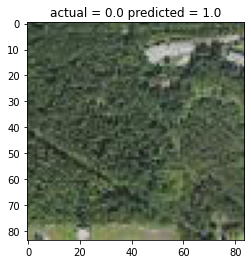

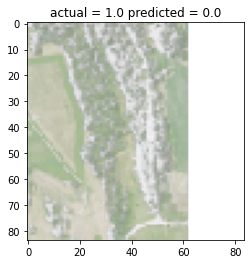

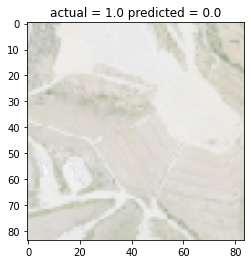

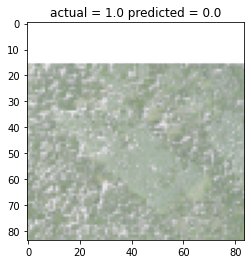

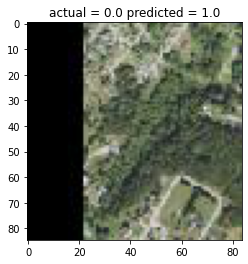

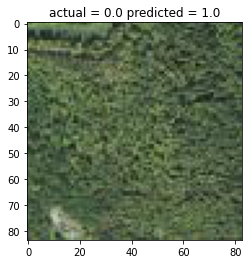

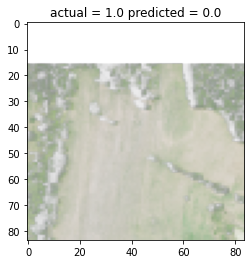

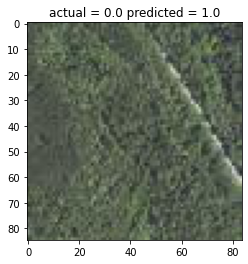

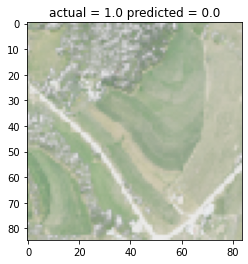

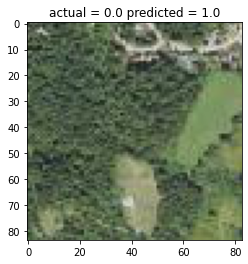

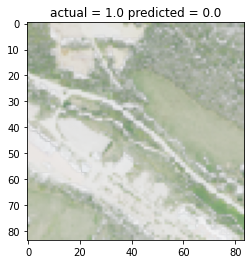

In [60]:
for i in range(len(incorrect)):
  plt.imshow(plt.imread(incorrect['path'].iloc[i]))
  plt.title(label='actual = '+str(incorrect['actual'].iloc[i])+' predicted = '+str(incorrect['predicted'].iloc[i]))
  plt.show()

It looks like this model strugles when there are linear features in the image that are not indicating a well pad.

##Previous code version, no longer in use

In [10]:
'''X_train = []
y_train = []
X_test = []
y_test = []
for i in range(len(notvis_test)):
  X_test.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_visible/'+notvis_test[i]),(85,84),interpolation= cv.INTER_LINEAR)))
  temp = notvis_test[i].split('.')
  y_test.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
for i in range(len(notvis_test)):
  temp = notvis_test[i].split('.')
  X_test.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_vis_mod/c90/'+temp[0]+'.jpg'),(85,84),interpolation= cv.INTER_LINEAR)))
  y_test.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
for i in range(len(notvis_test)):
  temp = notvis_test[i].split('.')
  X_test.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_vis_mod/c180/'+temp[0]+'.jpg'),(85,84),interpolation= cv.INTER_LINEAR)))
  y_test.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
for i in range(len(notvis_test)):
  temp = notvis_test[i].split('.')
  X_test.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_vis_mod/cc90/'+temp[0]+'.jpg'),(85,84),interpolation= cv.INTER_LINEAR)))
  y_test.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
for i in range(len(vis_test)):
  X_test.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/visible/'+vis_test[i]),(85,84),interpolation= cv.INTER_LINEAR)))
  temp = vis_test[i].split('.')
  y_test.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
for i in range(len(notvis_train)):
  X_train.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_visible/'+notvis_train[i]),(85,84),interpolation= cv.INTER_LINEAR)))
  temp = notvis_train[i].split('.')
  y_train.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
for i in range(len(notvis_train)):
  temp = notvis_train[i].split('.')
  X_train.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_vis_mod/c90/'+temp[0]+'.jpg'),(85,84),interpolation= cv.INTER_LINEAR)))
  y_train.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
for i in range(len(notvis_train)):
  temp = notvis_train[i].split('.')
  X_train.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_vis_mod/c180/'+temp[0]+'.jpg'),(85,84),interpolation= cv.INTER_LINEAR)))
  y_train.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
for i in range(len(notvis_train)):
  temp = notvis_train[i].split('.')
  X_train.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_vis_mod/cc90/'+temp[0]+'.jpg'),(85,84),interpolation= cv.INTER_LINEAR)))
  y_train.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
for i in range(len(vis_train)):
  X_train.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/visible/'+vis_train[i]),(85,84),interpolation= cv.INTER_LINEAR)))
  temp = vis_train[i].split('.')
  y_train.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)
print(len(X_test))
print(len(y_test))
print(len(X_train))
print(len(y_train))'''

"X_train = []\ny_train = []\nX_test = []\ny_test = []\nfor i in range(len(notvis_test)):\n  X_test.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_visible/'+notvis_test[i]),(85,84),interpolation= cv.INTER_LINEAR)))\n  temp = notvis_test[i].split('.')\n  y_test.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)\nfor i in range(len(notvis_test)):\n  temp = notvis_test[i].split('.')\n  X_test.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_vis_mod/c90/'+temp[0]+'.jpg'),(85,84),interpolation= cv.INTER_LINEAR)))\n  y_test.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)\nfor i in range(len(notvis_test)):\n  temp = notvis_test[i].split('.')\n  X_test.append(np.array(cv.resize(cv.imread('gdrive/My Drive/wash250/not_vis_mod/c180/'+temp[0]+'.jpg'),(85,84),interpolation= cv.INTER_LINEAR)))\n  y_test.append(wash_head[wash_head['PERMIT_NUMBER']==temp[0]].visible.values)\nfor i in range(len(notvis_test)):\n  temp = notvis_tes

In [11]:
'''X_train2 = np.array(X_train)
X_test2 = np.array(X_test)
y_train2 = y_train
y_test2 = y_test'''

'X_train2 = np.array(X_train)\nX_test2 = np.array(X_test)\ny_train2 = y_train\ny_test2 = y_test'

In [12]:
'''y_train2=[]
for i in range(len(y_train)):
  y_train2.append(y_train[i][0])
y_train2[0]'''

'y_train2=[]\nfor i in range(len(y_train)):\n  y_train2.append(y_train[i][0])\ny_train2[0]'

In [13]:
X_train.to_csv('gdrive/My Drive/Springboard_Capstone_3/X_train.csv')
X_test.to_csv('gdrive/My Drive/Springboard_Capstone_3/X_test.csv')
y_train.to_csv('gdrive/My Drive/Springboard_Capstone_3/y_train.csv')
y_test.to_csv('gdrive/My Drive/Springboard_Capstone_3/y_test.csv')